In [1]:
import os
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir(r"C:\Users\me19b\OneDrive\Desktop\PRML")
os.getcwd()

'C:\\Users\\me19b\\OneDrive\\Desktop\\PRML'

In [4]:
data=pd.read_csv('Dataset.csv',header=None)
data.columns=['x1','x2']
data

,x1,x2
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


Text(0.5, 1.0, 'data points')

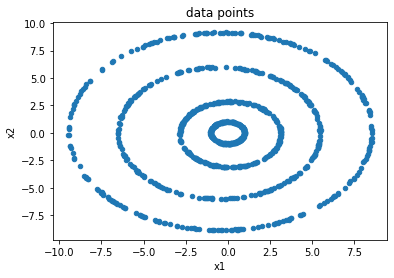

In [5]:
data.plot(kind='scatter',x='x1',y='x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data points')

# Centered Data

In [6]:
mean_x=data['x1'].mean()
mean_y=data['x2'].mean()

In [7]:
mean_x

4.074999999685858e-07

In [8]:
mean_y

2.2270000001611835e-07

In [69]:
dataset = data.to_numpy().transpose()
dataset

array([[ 0.143  , -0.30467,  0.46625, ...,  6.1062 , -7.4094 , -0.12948],
       [ 0.98493,  0.98562, -0.84003, ..., -5.9864 , -5.5205 , -8.8036 ]])

In [10]:
a1 = dataset[0,:]-mean_x
a2 = dataset[1,:]-mean_y
data_mean = np.vstack((a1,a2))
data_mean

array([[ 0.14299959, -0.30467041,  0.46624959, ...,  6.10619959,
        -7.40940041, -0.12948041],
       [ 0.98492978,  0.98561978, -0.84003022, ..., -5.98640022,
        -5.52050022, -8.80360022]])

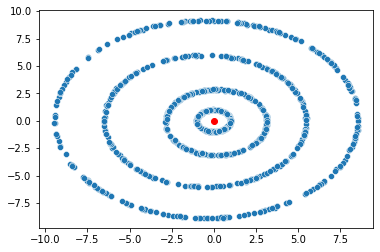

In [11]:
sns.scatterplot(data_mean[0,:],data_mean[1,:])
plt.scatter(mean_x,mean_y,color='red')

In [12]:
data_transpose = data_mean.transpose()

In [13]:
data_mean

array([[ 0.14299959, -0.30467041,  0.46624959, ...,  6.10619959,
        -7.40940041, -0.12948041],
       [ 0.98492978,  0.98561978, -0.84003022, ..., -5.98640022,
        -5.52050022, -8.80360022]])

In [14]:
data_transpose

array([[ 0.14299959,  0.98492978],
       [-0.30467041,  0.98561978],
       [ 0.46624959, -0.84003022],
       ...,
       [ 6.10619959, -5.98640022],
       [-7.40940041, -5.52050022],
       [-0.12948041, -8.80360022]])

In [15]:
C= np.matmul(data_mean,data_transpose)
cov_matrix = (1/1000)*C
cov_matrix

array([[14.76615576,  0.80885904],
       [ 0.80885904, 16.85536339]])

In [16]:
eigen_values,eigen_vectors=np.linalg.eig(cov_matrix)

I = eigen_values.argsort()[::-1]
eigen_values=eigen_values[I]
eigen_vectors=eigen_vectors[:,I]


In [17]:
print(eigen_values)

[17.1319144  14.48960475]


In [18]:
#eigen vectors are principle components of covariance matrix
print(eigen_vectors)

[[-0.323516  -0.9462227]
 [-0.9462227  0.323516 ]]


In [19]:
W_1=eigen_vectors[:,0]
W_2=eigen_vectors[:,1]


In [20]:
W_1

array([-0.323516 , -0.9462227])

In [21]:
print('variance with respect to ',W_1,'is', eigen_values[0])
print('variance with respect to ',W_2,'is', eigen_values[1])

variance with respect to  [-0.323516  -0.9462227] is 17.13191440244437
variance with respect to  [-0.9462227  0.323516 ] is 14.489604749330637


In [22]:
variance_princ_comp1_c = eigen_values[0]/(eigen_values[0]+eigen_values[1])
variance_princ_comp2_c = eigen_values[1]/(eigen_values[0]+eigen_values[1])
perct_var_pc1 = variance_princ_comp1_c*100
perct_var_pc2 = variance_princ_comp2_c*100
print('percentage of variance PC1 centered is',perct_var_pc1)
print('percentage of variance PC2 centered is',perct_var_pc2)

percentage of variance PC1 centered is 54.178024528852234
percentage of variance PC2 centered is 45.821975471147766


In [23]:
df=np.array(np.matmul(data_transpose,eigen_vectors))

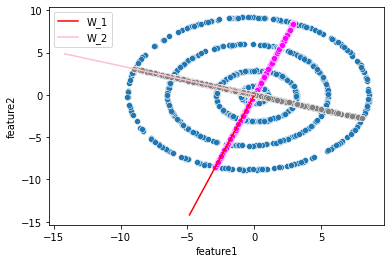

In [24]:
sns.scatterplot(data_mean[0,:],data_mean[1,:])
plt.scatter(mean_x,mean_y,color='red')
plt.plot([0,15*W_1[0]],[0,15*W_1[1]], color='red', label='W_1')
plt.plot([0,15*W_2[0]],[0,15*W_2[1]], color='pink', label='W_2')
sns.scatterplot(df[:,0]*W_1[0],df[:,0]*W_1[1], color = 'magenta')
sns.scatterplot(df[:,1]*W_2[0],df[:,1]*W_2[1], color = 'grey')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()

# Uncentered Data

In [25]:
Z= dataset
Z_transpose = Z.transpose()

In [26]:
Z_transpose

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [27]:
C= Z@Z_transpose
covariance_matric = (1/1000)*C
covariance_matric

array([[14.76615576,  0.80885904],
       [ 0.80885904, 16.85536339]])

In [28]:
eigen_values_UC,eigen_vectors_UC=np.linalg.eig(covariance_matric)

ab = eigen_values_UC.argsort()[::-1]
eigen_values_UC=eigen_values_UC[ab]
eigen_vectors_UC=eigen_vectors_UC[:,ab]

In [29]:
print(eigen_values_UC)


[17.1319144  14.48960475]


In [30]:
print(eigen_vectors_UC)

[[-0.323516  -0.9462227]
 [-0.9462227  0.323516 ]]


In [31]:
eigen_vectors_UC_trans = eigen_vectors_UC.transpose()
eigen_vectors_UC_trans

array([[-0.323516 , -0.9462227],
       [-0.9462227,  0.323516 ]])

In [32]:
W_1_UC=eigen_vectors_UC[:,0]
W_2_UC=eigen_vectors_UC[:,1]

In [33]:
print('variance with respect to ',W_1_UC,'is', eigen_values_UC[0])
print('variance with respect to ',W_2_UC,'is', eigen_values_UC[1])

variance with respect to  [-0.323516  -0.9462227] is 17.131914402444487
variance with respect to  [-0.9462227  0.323516 ] is 14.489604749330736


In [34]:
variance_princ_comp1_UC = eigen_values_UC[0]/(eigen_values_UC[0]+eigen_values_UC[1])
variance_princ_comp2_UC = eigen_values_UC[1]/(eigen_values_UC[0]+eigen_values_UC[1])
perct_var_pc1_UC = variance_princ_comp1_UC*100
perct_var_pc2_UC = variance_princ_comp2_UC*100
print('percentage of variance PC1 uncentered is',perct_var_pc1_UC)
print('percentage of variance PC2 uncentered is',perct_var_pc2_UC)

percentage of variance PC1 uncentered is 54.178024528852234
percentage of variance PC2 uncentered is 45.821975471147766


In [35]:
print(eigen_values_UC[0]>eigen_values[0])
print(eigen_values_UC[1]>eigen_values[1])

True
True


# iii. Write a piece of code to implement the Kernel PCA algorithm on this dataset. Use the following kernels :
A. κ(x, y) = (1 + xT y)^d for d = {2, 3}

In [36]:
d=2
k=np.empty([1000,1000])
for i in range(len(data)):
    for j in range(len(data)):
        k[i][j]=np.power((sum(np.multiply(dataset[:,i],dataset[:,j]))+1),d)


In [37]:
M = np.eye(1000)-(1/1000)*np.ones([1000,1000])
K_centre = M@k@M
print(K_centre)

[[  472.6514272    472.02530375   471.15703819 ...  -593.72254285
   -874.7179173   -763.74135231]
 [  472.02530375   472.1944362    470.72268705 ...  -564.57809378
   -900.54274871  -764.91465279]
 [  471.15703819   470.72268705   477.20843209 ...  -528.71716262
   -897.75829102  -750.9874846 ]
 ...
 [ -593.72254285  -564.57809378  -528.71716262 ...  3805.66591912
  -1858.19351179   898.13417179]
 [ -874.7179173   -900.54274871  -897.75829102 ... -1858.19351179
   5182.1070889    359.78609535]
 [ -763.74135231  -764.91465279  -750.9874846  ...   898.13417179
    359.78609535  4050.98503774]]


In [38]:
eigen_values, eigen_vectors = np.linalg.eig(K_centre)

I = eigen_values.argsort()[::-1]   
eigen_values= eigen_values[I]
eigen_vectors= eigen_vectors[:,I]

In [39]:
eig_val_real = eigen_values.real
eig_val_real

array([ 5.60408032e+05,  4.97707378e+05,  4.23270529e+05,  3.39999467e+04,
        2.86264368e+04,  5.44741779e-11,  4.45440850e-11,  4.45440850e-11,
        4.21736362e-11,  3.78596053e-11,  3.78596053e-11,  3.52155880e-11,
        3.52155880e-11,  3.29627718e-11,  2.90313664e-11,  2.90313664e-11,
        2.83209329e-11,  2.83209329e-11,  2.74063442e-11,  2.61927543e-11,
        2.61927543e-11,  2.61264109e-11,  2.61264109e-11,  2.49426006e-11,
        2.49426006e-11,  2.44658728e-11,  2.44658728e-11,  2.24353142e-11,
        2.24353142e-11,  2.21943178e-11,  2.18622961e-11,  2.18622961e-11,
        2.05993825e-11,  2.05993825e-11,  1.94067998e-11,  1.94067998e-11,
        1.90672348e-11,  1.90672348e-11,  1.85376642e-11,  1.85376642e-11,
        1.84346019e-11,  1.84346019e-11,  1.83614760e-11,  1.83614760e-11,
        1.81506505e-11,  1.77837001e-11,  1.77837001e-11,  1.66847663e-11,
        1.66847663e-11,  1.64889685e-11,  1.64889685e-11,  1.58401874e-11,
        1.58401874e-11,  

In [40]:
eig_vec_real = eigen_vectors.real
eig_vec_real

array([[-0.0216369 ,  0.00218602, -0.02203242, ...,  0.00553879,
        -0.04846055, -0.04846055],
       [-0.02193616,  0.00284154, -0.02147589, ...,  0.00795244,
        -0.01301589, -0.01301589],
       [-0.02234344,  0.00269801, -0.0213343 , ...,  0.02471922,
         0.01705084,  0.01705084],
       ...,
       [-0.00159556,  0.05550981,  0.07025395, ...,  0.02122322,
        -0.02374549, -0.02374549],
       [ 0.05062236, -0.08371748,  0.01749212, ...,  0.05851468,
         0.12112657,  0.12112657],
       [ 0.07297801,  0.04128522, -0.01032308, ..., -0.08301542,
        -0.09277375, -0.09277375]])

In [41]:
matrix = np.empty([1000,1000])
for i in range(1000):
    matrix[:,i] = eig_vec_real[:,i]/np.power(1000*abs(eig_val_real[i]),(1/2))
 
    

In [42]:
matrix

array([[-9.13992896e-07,  9.79867371e-08, -1.07091035e-06, ...,
         2.73364140e+01, -2.26092459e+02, -2.26092459e+02],
       [-9.26634376e-07,  1.27369939e-07, -1.04385953e-06, ...,
         3.92488760e+01, -6.07255816e+01, -6.07255816e+01],
       [-9.43839074e-07,  1.20936291e-07, -1.03697777e-06, ...,
         1.22000492e+02,  7.95506037e+01,  7.95506037e+01],
       ...,
       [-6.74002675e-08,  2.48818529e-06,  3.41477218e-06, ...,
         1.04746157e+02, -1.10784471e+02, -1.10784471e+02],
       [ 2.13840643e-06, -3.75257271e-06,  8.50223947e-07, ...,
         2.88796364e+02,  5.65115395e+02,  5.65115395e+02],
       [ 3.08276079e-06,  1.85057874e-06, -5.01765127e-07, ...,
        -4.09718556e+02, -4.32835452e+02, -4.32835452e+02]])

Text(0, 0.5, 'projection_2')

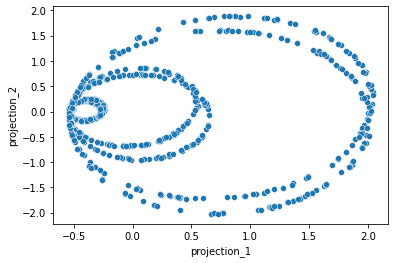

In [43]:
sns.scatterplot(np.matmul(K_centre,matrix)[:,0],np.matmul(K_centre,matrix)[:,1])
plt.xlabel('projection_1')
plt.ylabel('projection_2')

# for d=3

In [44]:
d=3
k_3=np.empty([1000,1000])
for i in range(len(data)):
    for j in range(len(data)):
        k_3[i][j]=np.power((sum(np.multiply(dataset[:,i],dataset[:,j]))+1),d)

In [45]:
M_3 = np.eye(1000)-(1/1000)*np.ones([1000,1000])
K_centre_3 = M_3@k_3@M_3
print(K_centre_3)

[[ 1.55143540e+03  1.54350425e+03  1.55928257e+03 ...  3.06572581e+03
  -9.31431219e+03 -3.83703034e+02]
 [ 1.54350425e+03  1.53794077e+03  1.55206691e+03 ...  2.81462352e+03
  -9.16583782e+03 -3.81762627e+02]
 [ 1.55928257e+03  1.55206691e+03  1.58210085e+03 ...  3.84578373e+03
  -9.12210290e+03  6.65709540e+02]
 ...
 [ 3.06572581e+03  2.81462352e+03  3.84578373e+03 ...  4.11960580e+05
  -8.96411670e+03  1.49788517e+05]
 [-9.31431219e+03 -9.16583782e+03 -9.12210290e+03 ... -8.96411670e+03
   6.24575718e+05  1.18623661e+05]
 [-3.83703034e+02 -3.81762627e+02  6.65709540e+02 ...  1.49788517e+05
   1.18623661e+05  4.82707369e+05]]


In [46]:
eigen_values_3, eigen_vectors_3 = np.linalg.eig(K_centre_3)

I_3 = eigen_values_3.argsort()[::-1]   
eigen_values_3= eigen_values_3[I_3]
eigen_vectors_3= eigen_vectors_3[:,I_3]

In [47]:
eig_val_real_3 = eigen_values_3.real
eig_vec_real_3 = eigen_vectors_3.real

In [48]:
eig_val_real_3

array([ 6.18486667e+07,  4.84635837e+07,  1.92173240e+07,  1.64004551e+07,
        1.63841479e+06,  1.45018850e+06,  1.23004822e+06,  6.73474795e+03,
        6.72342588e+03,  3.46742689e-09,  3.46742689e-09,  3.31370670e-09,
        2.96806943e-09,  2.96806943e-09,  2.88582170e-09,  2.88582170e-09,
        2.79797417e-09,  2.71980549e-09,  2.71980549e-09,  2.60536663e-09,
        2.45305834e-09,  2.45305834e-09,  2.37405902e-09,  2.37405902e-09,
        2.36302003e-09,  2.27952582e-09,  2.27952582e-09,  2.27629982e-09,
        2.27629982e-09,  2.20604067e-09,  2.20604067e-09,  2.09819295e-09,
        2.03545316e-09,  2.03545316e-09,  2.01653324e-09,  2.01653324e-09,
        1.93369113e-09,  1.93369113e-09,  1.89607850e-09,  1.89607850e-09,
        1.86475625e-09,  1.86475625e-09,  1.71552697e-09,  1.71040220e-09,
        1.71040220e-09,  1.69688529e-09,  1.69688529e-09,  1.65651938e-09,
        1.65651938e-09,  1.64547206e-09,  1.64547206e-09,  1.61183622e-09,
        1.61183622e-09,  

In [49]:
eig_vec_real_3

array([[ 2.51203157e-04, -1.74597202e-03, -8.22181611e-04, ...,
         2.66427922e-03,  2.66427922e-03,  5.92397096e-03],
       [ 2.39168574e-04, -1.68028316e-03, -7.83960003e-04, ...,
         3.95928622e-03,  3.95928622e-03,  6.58576673e-03],
       [ 6.89643087e-05, -1.86064108e-03, -9.26118114e-04, ...,
         3.10268226e-03,  3.10268226e-03,  6.12425296e-03],
       ...,
       [-2.71028790e-02, -6.83425355e-02,  3.04148538e-02, ...,
        -1.62048172e-02, -1.62048172e-02, -1.61155131e-02],
       [-6.89268809e-02,  6.30111165e-02,  7.57852536e-02, ...,
        -7.27743326e-02, -7.27743326e-02, -1.79147271e-02],
       [-7.39942345e-02, -3.13786610e-02, -5.48678426e-02, ...,
        -2.17547837e-02, -2.17547837e-02, -2.33950699e-02]])

In [50]:
matrix_3 = np.empty([1000,1000])
for i in range(1000):
    matrix_3[:,i] = eig_vec_real_3[:,i]/np.power(1000*abs(eig_val_real_3[i]),(1/2))

matrix_3

array([[ 1.01008965e-09, -7.93102862e-09, -5.93090957e-09, ...,
         1.37136257e+00,  1.37136257e+00,  2.74870600e+00],
       [ 9.61698512e-10, -7.63263881e-09, -5.65519324e-09, ...,
         2.03793090e+00,  2.03793090e+00,  3.05577740e+00],
       [ 2.77305968e-10, -8.45190960e-09, -6.68066850e-09, ...,
         1.59701817e+00,  1.59701817e+00,  2.84163629e+00],
       ...,
       [-1.08980866e-07, -3.10444038e-07,  2.19401340e-07, ...,
        -8.34097257e+00, -8.34097257e+00, -7.47755311e+00],
       [-2.77155471e-07,  2.86226218e-07,  5.46686377e-07, ...,
        -3.74585349e+01, -3.74585349e+01, -8.31238340e+00],
       [-2.97531335e-07, -1.42536682e-07, -3.95796025e-07, ...,
        -1.11976613e+01, -1.11976613e+01, -1.08552472e+01]])

Text(0, 0.5, 'projection_2')

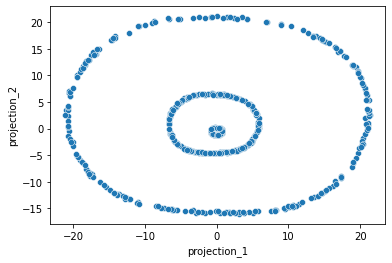

In [51]:
sns.scatterplot(np.matmul(K_centre_3,matrix_3)[:,0],np.matmul(K_centre_3,matrix_3)[:,1])
plt.xlabel('projection_1')
plt.ylabel('projection_2')

#B. κ(x, y) = exp −(x−y)T(x−y)/2σ2 for σ = {0.1, 0.2, . . . , 1}

In [62]:
N=len(data)

In [84]:
def sigma(dataset,s):
    K_s = np.empty([1000,1000])
    for i in range(0,N):
        for j in range(i,N): 
            k0 = math.exp((-((dataset[:,i]-dataset[:,j]).transpose())@(dataset[:,i]-dataset[:,j]))/(2*(s**2)))
            K_s[i,j] = k0
            K_s[j,i] = k0
        
    M_s = np.eye(1000)-(1/1000)*np.ones([1000,1000])
    k_centre_s = M_s@K_s@M_s
        
    eigen_values_s, eigen_vectors_s = np.linalg.eig(k_centre_s)
    I_s = eigen_values_s.argsort()[::-1]   
    eigen_values_s= eigen_values_s[I_s]
    eigen_vectors_s= eigen_vectors_s[:,I_s]
    matrix_s = np.empty([1000,1000])
    for k in range(1000):
        matrix_s[:,k] = eigen_vectors_s[:,k]/np.power(1000*abs(eigen_values_s[k]),(1/2))
        
    return k_centre_s,matrix_s
    

Text(0.5, 1.0, 'Sigma = 1')

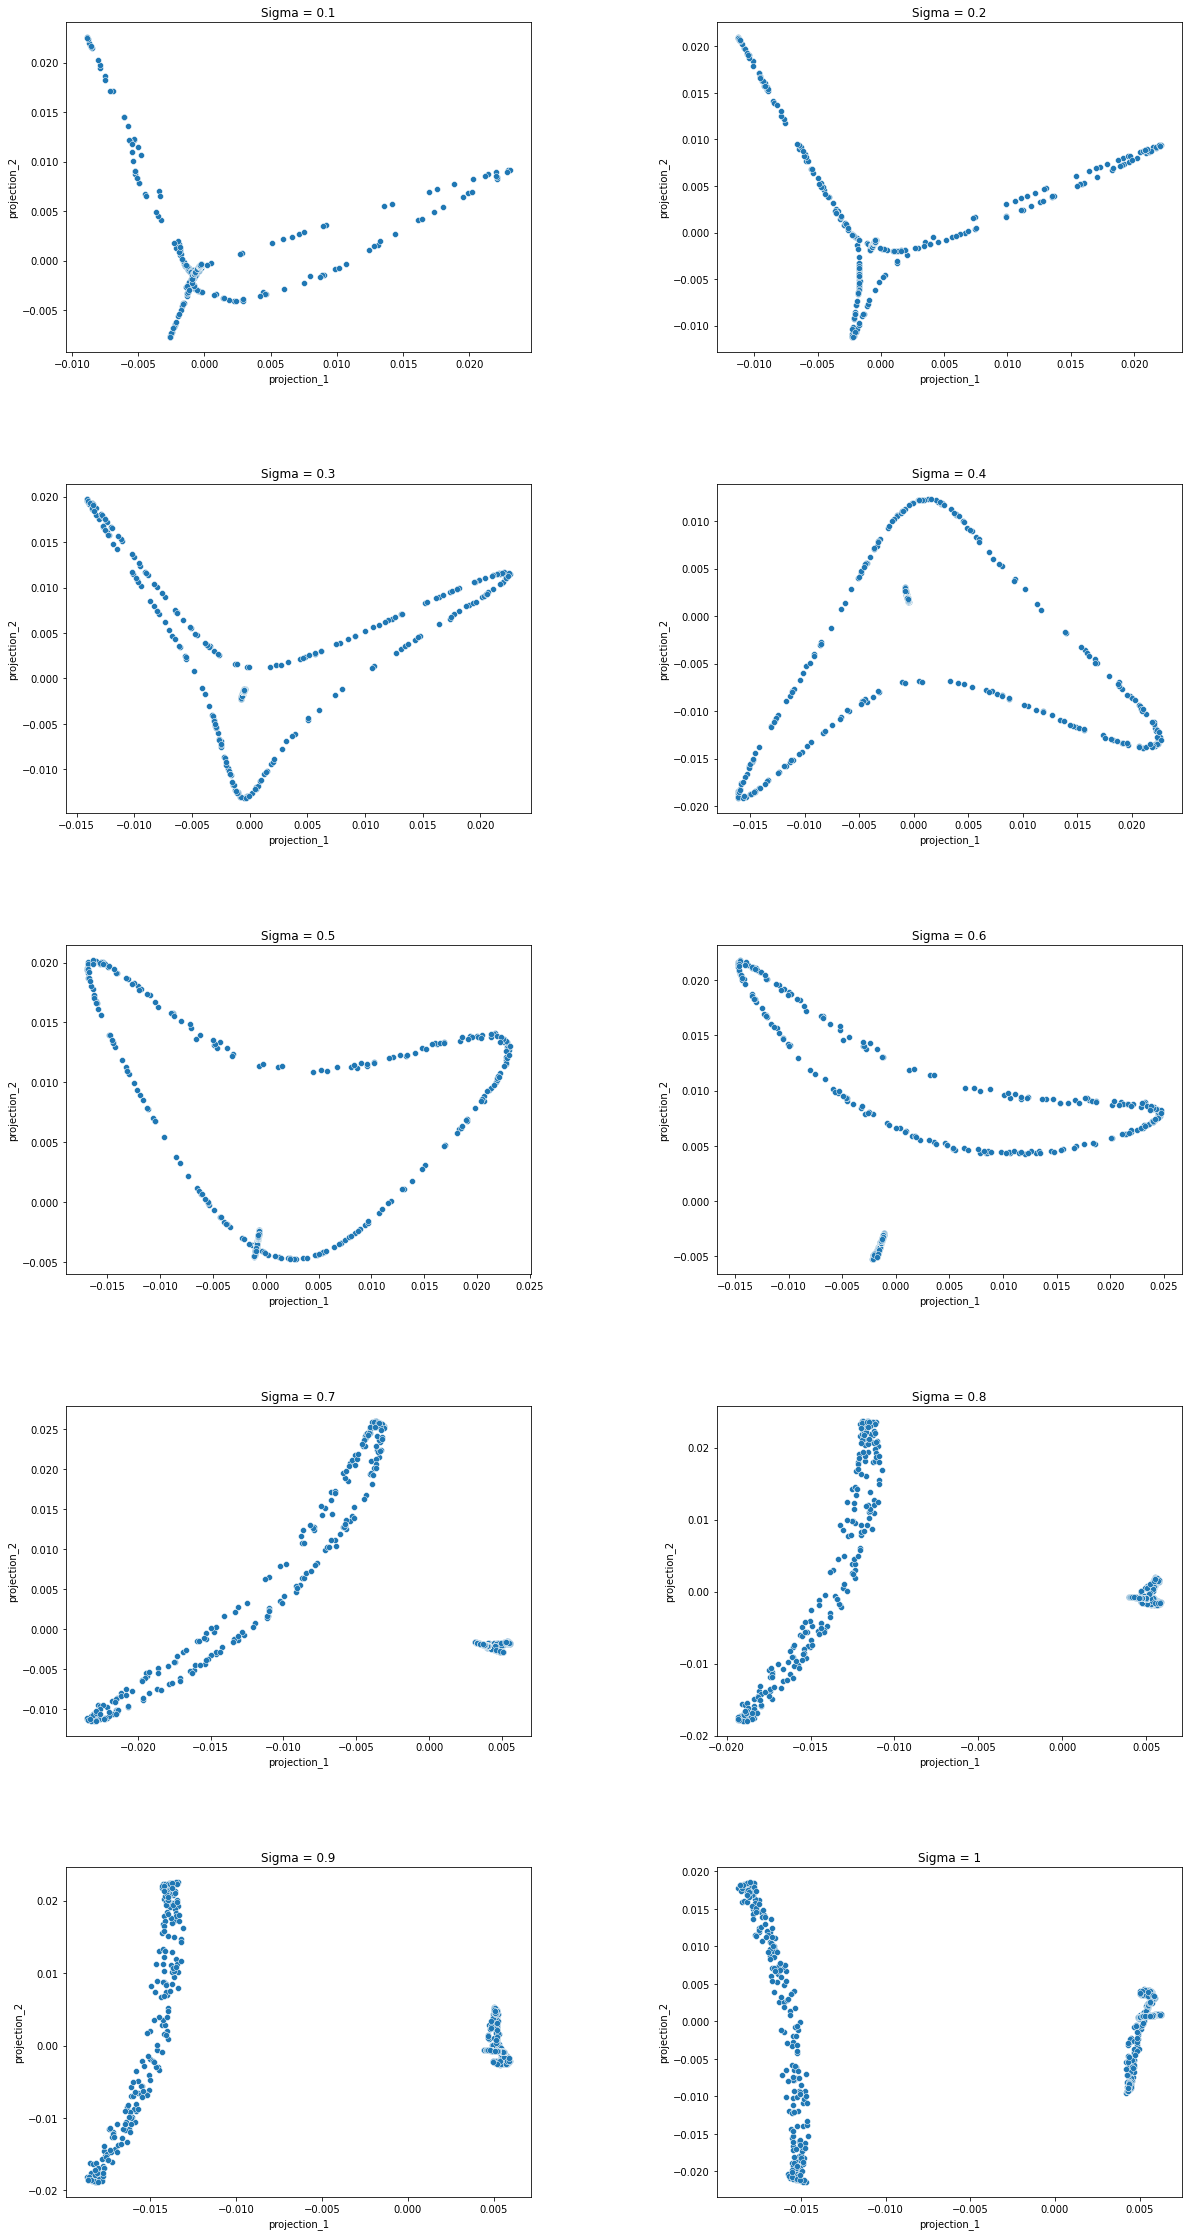

In [87]:
fig, axes = plt.subplots(5, 2, figsize=(20,40))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
s=0.1
for i in range(5):
    for j in range(2):
        k_centre_s, matrix_s = sigma(dataset,s)
        matrix_mult = np.matmul(k_centre_s,matrix_s)
        s=s+0.1
        sns.scatterplot(matrix_mult[:,0],matrix_mult[:,1],ax=axes[i][j])
        axes[i][j].set_xlabel('projection_1')
        axes[i][j].set_ylabel('projection_2')

axes[0][0].set_title('Sigma = 0.1')
axes[0][1].set_title('Sigma = 0.2')
axes[1][0].set_title('Sigma = 0.3')
axes[1][1].set_title('Sigma = 0.4')
axes[2][0].set_title('Sigma = 0.5')
axes[2][1].set_title('Sigma = 0.6')
axes[3][0].set_title('Sigma = 0.7')
axes[3][1].set_title('Sigma = 0.8')
axes[4][0].set_title('Sigma = 0.9')
axes[4][1].set_title('Sigma = 1')
      